Resultado
[ 6.33722925  6.61920409  6.61920409 -6.3392311   1.61216907  5.44763428
 -6.3392311   1.61216907  5.44763428  0.23743639  0.23743639]
W = [6.33722925 6.61920409 6.61920409]
w = [array([-6.3392311 ,  1.61216907,  5.44763428])]	[array([-6.3392311 ,  1.61216907,  5.44763428])]
w0 = [0.23743639 0.23743639]


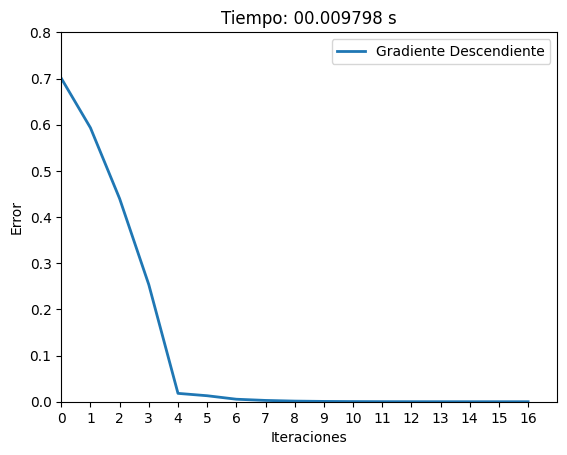

Resultado
[ 6.14978292  7.12182304  7.12182304 -2.7609107   0.53929392  2.34593696
 -2.7609107   0.53929392  2.34593696  0.06283707  0.06283707]
W = [6.14978292 7.12182304 7.12182304]
w = [array([-2.7609107 ,  0.53929392,  2.34593696])]	[array([-2.7609107 ,  0.53929392,  2.34593696])]
w0 = [0.06283707 0.06283707]


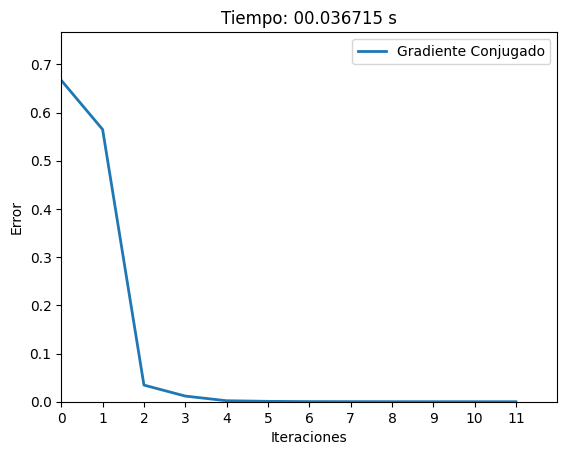

In [1]:
from datetime import datetime
import math
import numpy
from scipy.optimize import minimize
from plot import *

values = [[(4.4793, -4.0765, -4.0765), 0], [(-4.1793, -4.9218, 1.7664), 1], [(-3.9429, -0.7689, 4.883), 1]]

def g(x):
    return math.exp(x) / (1 + math.exp(x))

def F(W, w, w0, epsilon):
    sum = 0
    for i in range(0, 2):
        aux = 0
        for j in range(0, 3):
            aux += w[i][j] * epsilon[j]
        aux -= w0[i]
        sum += W[i + 1] * g(aux)
    return g(sum - W[0])

def E(x):
    W = x[0:3]
    w = [x[3:6], x[6:9]]
    w_0 = x[9:11]
    return sum((OUT - F(W, w, w_0, IN)) ** 2 for (IN, OUT) in values)

class Ej1:
    layers = []

    def print_res(self,x):
        print("Resultado")
        print(x)
        print("W = " + str(x[:3]))
        print("w = "+ str([x[3:6]]) + "\t" + str([x[6:9]]))
        print("w0 = " + str(x[9:11]))

    def add_layer(self, x):
        self.layers.append(E(x))

    def main(self):
        x1 = numpy.zeros(11)
        time1 = datetime.now()

        res1 = minimize(
            E, 
            x1, args=(), 
            method='L-BFGS-B', 
            jac=None, bounds=None, 
            tol=None, 
            callback=self.add_layer, 
            options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20, 'finite_diff_rel_step': None})
        
        self.print_res(res1['x'])
        plot(self.layers,datetime.now() - time1, "Gradiente Descendiente")

        self.layers = []
        x2 = numpy.zeros(11)
        time2 = datetime.now()

        res2 = minimize(
            E, 
            x2, 
            args=(), 
            method='CG', 
            jac=None, 
            tol=None, 
            callback=self.add_layer, 
            options={'gtol': 1e-05, 'norm': numpy.inf, 'eps': 1.4901161193847656e-08, 'maxiter': None, 'disp': False, 'return_all': False, 'finite_diff_rel_step': None})
        
        self.print_res(res2['x'])
        plot(self.layers,datetime.now() - time2, "Gradiente Conjugado")
ej1 = Ej1()
ej1.main()